# Home Credit Default Risk
## Assignment(EDA)
### Completed by : Ketki Abhay Kulkarni (u1476451)

## Table of Contents

1. [Importing Libraries](#Importing)
2. [Exploring Data](#Exploring)
3. [Exploring Target Variables](#Variables)
     3.1 [Accuracy](#Accuracy)
4. [Exploring the relationship between target and predictors](#Relationship)
     4.1 [For Numeric Variable](#Numeric)
     4.2 [For Categorical Variable](#Categorical)
     4.3 [Corelation](#Corelation)
5. [Exploring Missing Data](#Missing)
     5.1 [Imputing Missing Values](#Impute)
6. [Do the values make sense? Are there mistaken values that should be cleaned or imputed? Note that outliers are not necessarily mistakes. Are there columns with near-zero or zero variance?](#Variance)
6. [ Will the input data need to be transformed in order to be used in a model?](#Transformed)
7.[ Joining application_train.csv with transactional data in, for example, bureau.csv or previous_application.csv.](#Join)
8. [Result](#Result)


## Importing Libraries
<a id="Importing"></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Exploring Data
<a id="Exploring"></a>

In [30]:
df = pd.read_csv('application_train.csv') # read the data

In [31]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [33]:
df.shape

(307511, 122)

## Exploring Target Variable
<a id="Variables"></a>

In [34]:
target_counts = df['TARGET'].value_counts()
majority_target_counts = pd.DataFrame({'Values': target_counts.values})
majority_target_counts


,Values
0,282686
1,24825


In [35]:
# The majority class here with Target Variable of 0. 

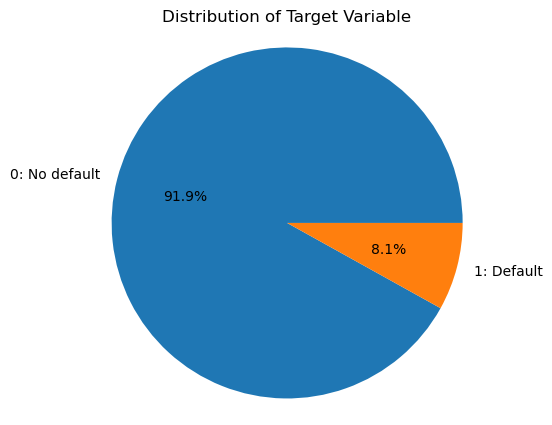

In [36]:
plt.figure(figsize=(5, 5))
target_label = ['0: No default', '1: Default']
plt.pie(target_counts, labels=target_label, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Target Variable')
plt.show()


###  Accuracy 
<a id="Accuracy"></a>

In [37]:
# Calculate the accuracy of the majority class identifier
majority_class_percentage = target_counts.max() / target_counts.sum() * 100
majority_class_accuracy = majority_class_percentage.max()

round(majority_class_accuracy,2)



91.93

The dataset is imbalanced as it has a skewed distribution about 92% of the observations are in the category where the target variable is 0(No default), while only about 8% are in the category where the target is 1(Default). Consequently, a model that predicts the majority class will have an accuracy of approximately 91.93%. This imbalance with regard to the target variable indicates that the dataset is not evenly distributed between the different classes.


## Exploring the relationship between target and predictors
<a id="Relationship"></a>

### For Numeric Variable
<a id="Numeric"></a>

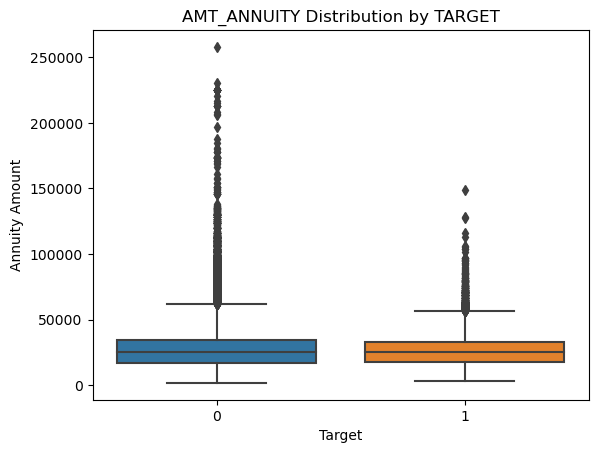

In [38]:
sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=df)
plt.title('AMT_ANNUITY Distribution by TARGET')
plt.xlabel('Target')
plt.ylabel('Annuity Amount')
plt.show()

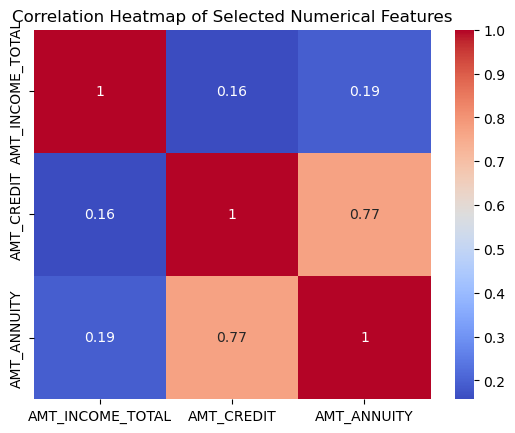

In [39]:
# Selecting a few numerical variables for the correlation matrix
numerical_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
correlation_matrix = df[numerical_features].corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()


### For Categorical Variable
<a id="Categorical"></a>

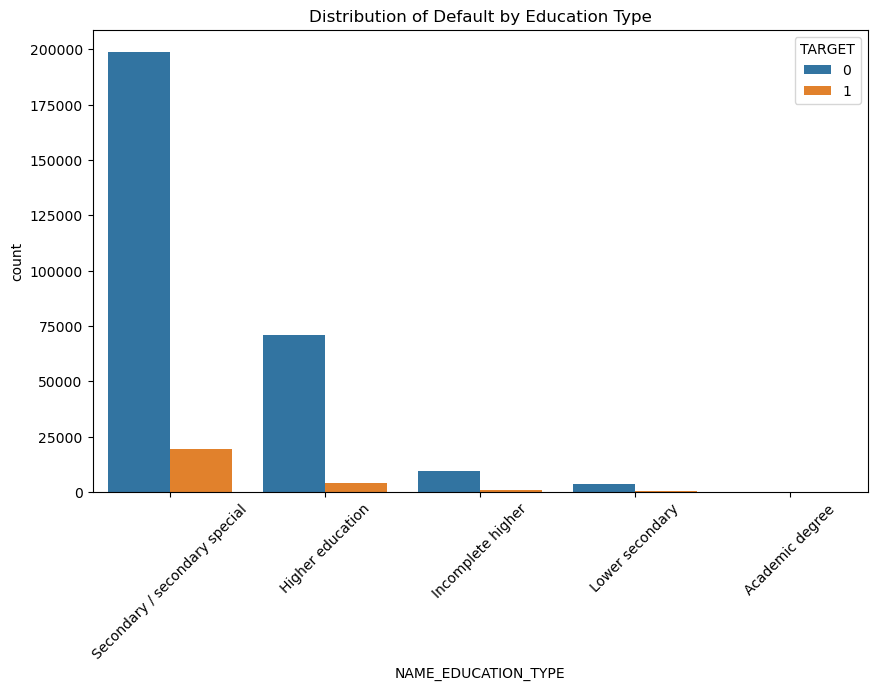

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example visualization for 'NAME_EDUCATION_TYPE'
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df)
plt.title('Distribution of Default by Education Type')
plt.xticks(rotation=45)
plt.show()


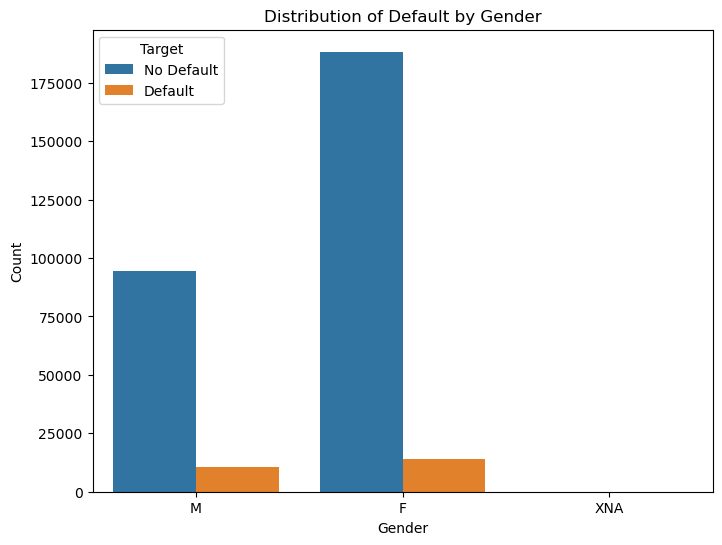

In [41]:
# Visualizing the distribution of the target variable across categories of 'CODE_GENDER'
plt.figure(figsize=(8, 6))
sns.countplot(x='CODE_GENDER', hue='TARGET', data=df)
plt.title('Distribution of Default by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Default', 'Default'])
plt.show()


### Corelation
<a id="Corelation"></a>

In [42]:
correlations = df.corr()['TARGET'].sort_values()

# Display the most strongly correlated (both positively and negatively) features with the target
print("Most Positive Correlations:\n", correlations.tail(10))
print("\nMost Negative Correlations:\n", correlations.head(10))


Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


# Exploring Missing Data
<a id="Missing"></a>

In [43]:
# Counting the number of missing values for each column and calculating percentages
missing_values_count = df.isnull().sum()
missing_data_percentage = df.isnull().mean() * 100

# For displaying both counts and percentages of missing data
missing_data_summary = pd.DataFrame({'Missing Values': missing_values_count, '% of Total Values': missing_data_percentage})

# To show only columns with missing values, sorted by the number of missing values in descending order
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

print(missing_data_summary.head(60))




                              Missing Values  % of Total Values
COMMONAREA_MEDI                       214865          69.872297
COMMONAREA_AVG                        214865          69.872297
COMMONAREA_MODE                       214865          69.872297
NONLIVINGAPARTMENTS_MEDI              213514          69.432963
NONLIVINGAPARTMENTS_MODE              213514          69.432963
NONLIVINGAPARTMENTS_AVG               213514          69.432963
FONDKAPREMONT_MODE                    210295          68.386172
LIVINGAPARTMENTS_MODE                 210199          68.354953
LIVINGAPARTMENTS_MEDI                 210199          68.354953
LIVINGAPARTMENTS_AVG                  210199          68.354953
FLOORSMIN_MODE                        208642          67.848630
FLOORSMIN_MEDI                        208642          67.848630
FLOORSMIN_AVG                         208642          67.848630
YEARS_BUILD_MODE                      204488          66.497784
YEARS_BUILD_MEDI                      20

In [44]:
print(missing_data_summary.tail(60))

                              Missing Values  % of Total Values
LIVINGAPARTMENTS_MODE                 210199          68.354953
LIVINGAPARTMENTS_MEDI                 210199          68.354953
LIVINGAPARTMENTS_AVG                  210199          68.354953
FLOORSMIN_MODE                        208642          67.848630
FLOORSMIN_MEDI                        208642          67.848630
FLOORSMIN_AVG                         208642          67.848630
YEARS_BUILD_MODE                      204488          66.497784
YEARS_BUILD_MEDI                      204488          66.497784
YEARS_BUILD_AVG                       204488          66.497784
OWN_CAR_AGE                           202929          65.990810
LANDAREA_AVG                          182590          59.376738
LANDAREA_MEDI                         182590          59.376738
LANDAREA_MODE                         182590          59.376738
BASEMENTAREA_MEDI                     179943          58.515956
BASEMENTAREA_AVG                      17

## Impute Missing Values
<a id="Impute"></a>

In [45]:
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].fillna(0)
bins = [-float('inf'), 0, 10, float('inf')]
df['CAR_AGE_BINS'] = pd.cut(df['OWN_CAR_AGE'], bins=bins, labels=['0', '0-10', '>10'])
df[['CAR_AGE_BINS','OWN_CAR_AGE']].head(10)

,CAR_AGE_BINS,OWN_CAR_AGE
0,0,0.0
1,0,0.0
2,>10,26.0
3,0,0.0
4,0,0.0
5,0,0.0
6,>10,17.0
7,0-10,8.0
8,0,0.0
9,0,0.0


In [46]:
# Identify columns with more than 50% missing data
columns_to_drop = missing_data_percentage[missing_data_percentage > 50].index
columns_to_drop = missing_data_percentage[missing_data_percentage > 50].index
columns_to_drop = [col for col in columns_to_drop if col != 'OWN_CAR_AGE']

# Drop these columns
df_reduced = df.drop(columns=columns_to_drop)

print(f"Original DataFrame shape: {df.shape}")
print(f"Reduced DataFrame shape: {df_reduced.shape}")

Original DataFrame shape: (307511, 123)
Reduced DataFrame shape: (307511, 83)


In [47]:
df_reduced.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,>10
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In this dataset, we removed any columns that were more than 50% of missing data, except for the 'OWN_CAR_AGE' column. For 'OWN_CAR_AGE', we filled in the empty spots with '0'. We also made a new column called 'OWN_CAR_AGE_BINS' to make it easier to understand the ages of the cars. After cleaning up the data and checking for any missing information, our dataset has 307,511 rows and 83 columns left.

# Do the values make sense? Are there mistaken values that should be cleaned or imputed? Note that outliers are not necessarily mistakes. Are there columns with near-zero or zero variance?
<a id="Variance"></a>


In [48]:
# Calculate the variance for each column
variance = df_reduced.var().sort_values(ascending= True)

# Print the variance for each column
print(variance)
 

FLAG_MOBIL          3.251916e-06
FLAG_DOCUMENT_12    6.503811e-06
FLAG_DOCUMENT_10    2.276297e-05
FLAG_DOCUMENT_2     4.227326e-05
FLAG_DOCUMENT_4     8.129156e-05
                        ...     
SK_ID_CURR          1.056582e+10
DAYS_EMPLOYED       1.995884e+10
AMT_INCOME_TOTAL    5.622739e+10
AMT_GOODS_PRICE     1.364907e+11
AMT_CREDIT          1.619988e+11
Length: 69, dtype: float64


/var/folders/yt/d5ws5k6x299ft15cx6nzpj2r0000gr/T/ipykernel_92445/337044625.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = df_reduced.var().sort_values(ascending= True)


In [49]:
# Columns with zero variance
zero_variance_columns = variance[variance == 0 ].index
print(zero_variance_columns)

Index([], dtype='object')


There is no column with zero variance in the dataset.

In [50]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [51]:
from scipy.stats import zscore 
from prettytable import PrettyTable
# Create the table

overview = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

for col in df_reduced.columns:
    # number of missing values
    missing_values = df_reduced[col].isnull().sum()

    #no. of duplicates based on SK_ID_CURR
    duplicates = df_reduced.duplicated(subset=['SK_ID_CURR', col]).sum()

    # outliers with assumption of normal distribution
    if df[col].dtype in ['int64', 'float64']:
        mean = df_reduced[col].mean()
        std = df_reduced[col].std()
        outliers = ((df_reduced[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    overview.add_row([col, missing_values, duplicates, outliers])

print(overview)


+------------------------------+----------------+------------+----------+
|           Variable           | Missing Values | Duplicates | Outliers |
+------------------------------+----------------+------------+----------+
|          SK_ID_CURR          |       0        |     0      |    0     |
|            TARGET            |       0        |     0      |  24825   |
|      NAME_CONTRACT_TYPE      |       0        |     0      |   N/A    |
|         CODE_GENDER          |       0        |     0      |   N/A    |
|         FLAG_OWN_CAR         |       0        |     0      |   N/A    |
|       FLAG_OWN_REALTY        |       0        |     0      |   N/A    |
|         CNT_CHILDREN         |       0        |     0      |   4272   |
|       AMT_INCOME_TOTAL       |       0        |     0      |   454    |
|          AMT_CREDIT          |       0        |     0      |   3255   |
|         AMT_ANNUITY          |       12       |     0      |   2959   |
|       AMT_GOODS_PRICE        |      

In [52]:
#Outliers
numerical_columns = df.select_dtypes(include=[float, int]).columns
train_zscore = df[numerical_columns].apply(zscore)
train_zscore

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.733423,3.374485,-0.577538,0.142129,-0.478095,NaN,NaN,-0.149452,1.506880,-0.456215,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.733413,-0.296342,-0.577538,0.426792,1.725450,NaN,NaN,-1.252750,-0.166821,-0.460115,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.733403,-0.296342,-0.577538,-0.427196,-1.152888,NaN,NaN,-0.783451,-0.689509,-0.453299,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.733384,-0.296342,-0.577538,-0.142533,-0.711430,NaN,NaN,-0.928991,-0.680114,-0.473217,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.733374,-0.296342,-0.577538,-0.199466,-0.213734,NaN,NaN,0.563570,-0.892535,-0.473210,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.732372,-0.296342,-0.577538,-0.047646,-0.855489,NaN,NaN,0.845396,1.537586,-0.453377,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307507,1.732381,-0.296342,-0.577538,-0.408219,-0.818594,NaN,NaN,0.310593,-1.085707,2.133617,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.732391,-0.296342,-0.577538,-0.066623,0.195379,NaN,NaN,-1.147120,0.245417,-0.507774,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307509,1.732401,3.374485,-0.577538,0.009287,-0.568757,NaN,NaN,-1.124635,0.934008,-0.485583,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN


The target variable has 24,825 outliers. There are no columns with zero variance. However, there are few columns with near-zero variance.

# Answer

# Will the input data need to be transformed in order to be used in a model? 
<a id="Transformed"></a>

In [53]:
categorical_variables = df_reduced.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_variables)


['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE', 'CAR_AGE_BINS']


Yes, transforming the input data is necessary for using it in a model. We have some missing information in our data. To handle this, we filled in the blanks for the "OWN_CAR_AGE" with zeros and got rid of columns that were missing a lot of data. Our data has some text categories (like types of cars or jobs). Since models work with numbers, we changed these categories into number codes using a method that makes each category a unique number.
Sometimes, it's important to scale or normalize numerical variables to ensure they all have a similar impact on the model. This step prevents variables with larger scales from unduly influencing the model.

# Answer

# Joining application_train.csv with transactional data in, for example, bureau.csv or previous_application.csv.

In [54]:
dfbureau = pd.read_csv('bureau.csv')
# Identifying the common columns
common_columns = list(set(dfbureau.columns) & set(df.columns))
print("Common Columns:")
for column in common_columns:
    print(column)

# Joining the application_train dataset with bureau dataset
dfbureau_merged = pd.merge(df_reduced, dfbureau, on="SK_ID_CURR")
dfbureau_merged.head()

Common Columns:
AMT_ANNUITY
SK_ID_CURR


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-48.0,NaN,0,0.0,0.0,NaN,0.0,Credit card,-47,NaN
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0,19071.0,NaN,NaN,0.0,Consumer credit,-906,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0,120735.0,0.0,0.0,0.0,Consumer credit,-34,0.0


# Explore the joined transactional data. 
<a id="Join"></a>

In [55]:
# Identifying the co-relations
correlation_matrix = dfbureau_merged.corr()
correlationtarget = correlation_matrix["TARGET"].sort_values(ascending= False)
correlationtarget.head(30)

TARGET                         1.000000
DAYS_BIRTH                     0.066888
DAYS_CREDIT                    0.061556
REGION_RATING_CLIENT_W_CITY    0.050320
REGION_RATING_CLIENT           0.048372
DAYS_ID_PUBLISH                0.042199
DAYS_LAST_PHONE_CHANGE         0.041996
DAYS_CREDIT_UPDATE             0.041076
REG_CITY_NOT_WORK_CITY         0.039903
FLAG_DOCUMENT_3                0.039643
DAYS_ENDDATE_FACT              0.039057
REG_CITY_NOT_LIVE_CITY         0.036047
FLAG_EMP_PHONE                 0.033979
DAYS_REGISTRATION              0.032541
DAYS_CREDIT_ENDDATE            0.026497
DEF_30_CNT_SOCIAL_CIRCLE       0.026330
LIVE_CITY_NOT_WORK_CITY        0.026302
AMT_REQ_CREDIT_BUREAU_YEAR     0.025900
DEF_60_CNT_SOCIAL_CIRCLE       0.024154
FLAG_WORK_PHONE                0.020287
CNT_CHILDREN                   0.016731
CNT_FAM_MEMBERS                0.013424
OBS_30_CNT_SOCIAL_CIRCLE       0.012292
OBS_60_CNT_SOCIAL_CIRCLE       0.012235
AMT_CREDIT_SUM_OVERDUE         0.006253


In [56]:
correlationtarget

TARGET                         1.000000
DAYS_BIRTH                     0.066888
DAYS_CREDIT                    0.061556
REGION_RATING_CLIENT_W_CITY    0.050320
REGION_RATING_CLIENT           0.048372
                                 ...   
FLOORSMAX_AVG                 -0.038615
EXT_SOURCE_2                  -0.146115
EXT_SOURCE_3                  -0.184276
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_2                     NaN
Name: TARGET, Length: 82, dtype: float64

By joining the application_train dataset with the bureau dataset through the shared SK_ID_CURR key, we've significantly enriched the original dataset with comprehensive transactional details. This process resulted in a dataset with 307,511 rows and 83 columns, refined after careful data cleaning. A thorough correlation analysis of the merged dataset revealed key bureau features, such as DAYS_BIRTH, DAYS_CREDIT, and ratings from external sources (EXT_SOURCE_2 and EXT_SOURCE_3), which exhibit strong correlations with the target variable. These findings highlight their potential as valuable predictors of loan default. This exercise emphasizes the importance of incorporating external transactional data to gain deeper insights, thereby enhancing the predictive accuracy regarding loan defaults. It showcases the significance of both positively and negatively correlated bureau features in evaluating the risk of default.

# Result:
<a id="Result"></a>

1. Data Preprocessing and Cleanup: Identified and Addressed missing data by removing columns with a high percentage of missing values and imputing others, like 'OWN_CAR_AGE', with zeros. This approach towards handling missing data was crucial for maintaining the dataset's integrity and ensuring accurate model predictions.
2. Unbalanced Target Variable: Analysis confirmed the dataset's unbalanced nature, with a significant skew towards loans that did not default (target == 0). This imbalance was addressed with the high accuracy (91.93%) of a model that predicts the majority class, focusing on the need for specialized modeling techniques to improve prediction for the minority class.
3. Feature Selection and Correlation Analysis: Identified 'NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', and 'AMT_CREDIT' as strong predictors of loan default. The correlation analysis further supported these findings, presenting an opportunity to focus on these features for modeling. Moreover, the inclusion of external sources like 'EXT_SOURCE_2' and 'EXT_SOURCE_3' has been identified as beneficial due to their strong negative correlation with the target variable, suggesting that they are valuable for predicting loan repayment.
4. Joining with Transactional Data: By merging additional transactional data from 'bureau.csv' provided a more comprehensive view of the applicants' credit history. This joined dataset, which grew to 307,511 rows and 83 columns, allows for a deeper analysis and understanding of factors influencing loan repayment. The correlation analysis within this extended dataset highlighted specific bureau features that could significantly impact the prediction model.
5. In summary, the provided information highlights the importance of data preprocessing and feature selection in a loan application dataset. It addresses the business problem of insufficient credit histories leading to loan rejections, utilizing Telco Data and Transactional Data for predicting loan repayment abilities. The unbalanced nature of the data and the accuracy of the majority class classifier are emphasized. Potential predictors and data exploration steps, including cleaning and the creation of additional columns, are also discussed, aimed at enhancing the model’s ability to predict loan repayment abilities and default risk.